# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [25]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
!kaggle datasets download -d rakeshkapilavai/extrovert-vs-introvert-behavior-data

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
extrovert-vs-introvert-behavior-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip "extrovert-vs-introvert-behavior-data.zip"

Archive:  extrovert-vs-introvert-behavior-data.zip
  inflating: personality_dataset.csv  


In [26]:
data = pd.read_csv('personality_dataset.csv')
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [28]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [29]:
data.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [30]:
data.duplicated().sum()

388

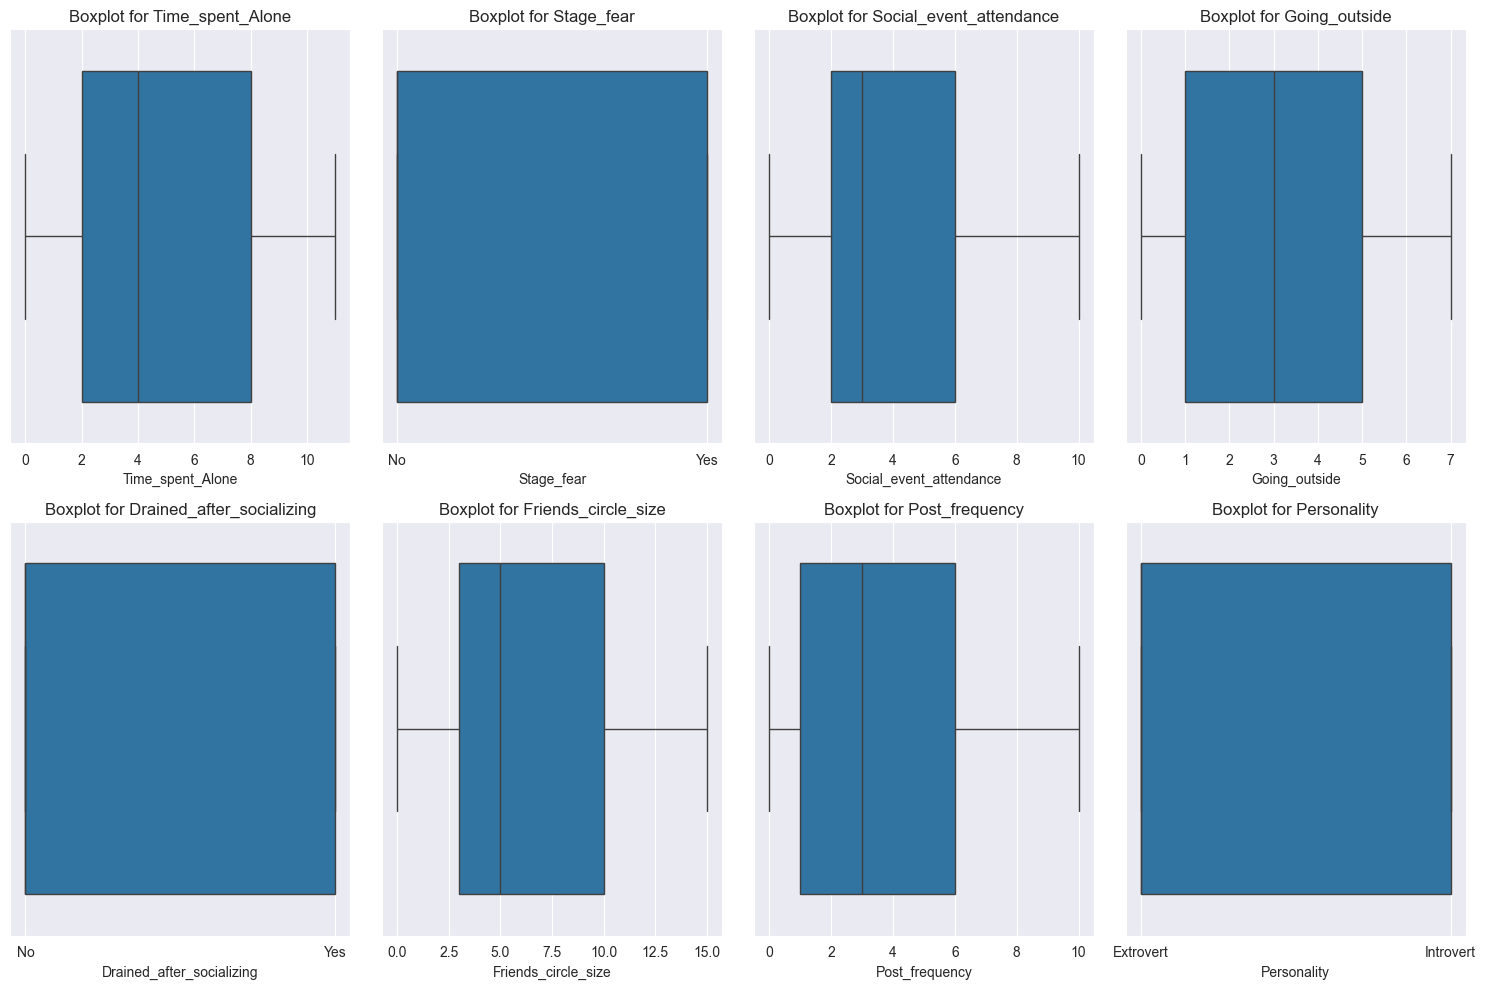

In [31]:
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

for ax, col in zip(axes.flatten(), data.columns):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Boxplot for {col}')

for i in range(len(data.columns), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

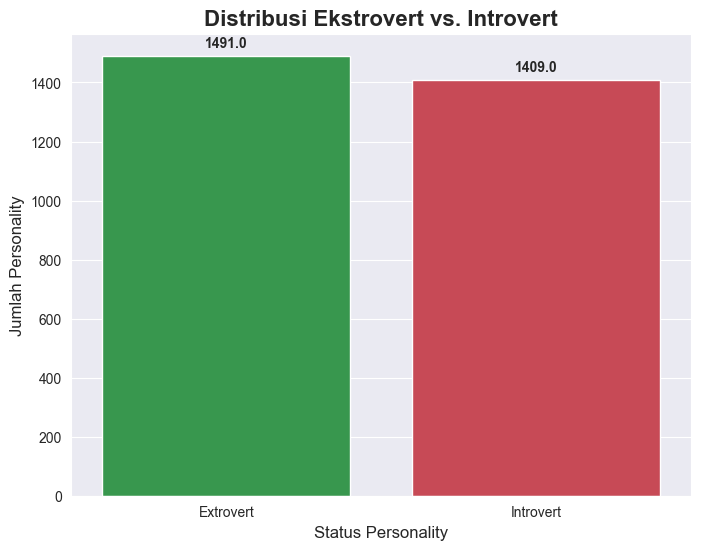

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Personality', hue='Personality', data=data, palette=['#28a745', '#dc3545'], legend=False)
plt.title('Distribusi Ekstrovert vs. Introvert', fontsize=16, weight='bold')
plt.xlabel('Status Personality', fontsize=12)
plt.ylabel('Jumlah Personality', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 9), textcoords='offset points', weight='bold')

array([[<Axes: title={'center': 'Time_spent_Alone'}>,
        <Axes: title={'center': 'Social_event_attendance'}>],
       [<Axes: title={'center': 'Going_outside'}>,
        <Axes: title={'center': 'Friends_circle_size'}>],
       [<Axes: title={'center': 'Post_frequency'}>, <Axes: >]],
      dtype=object)

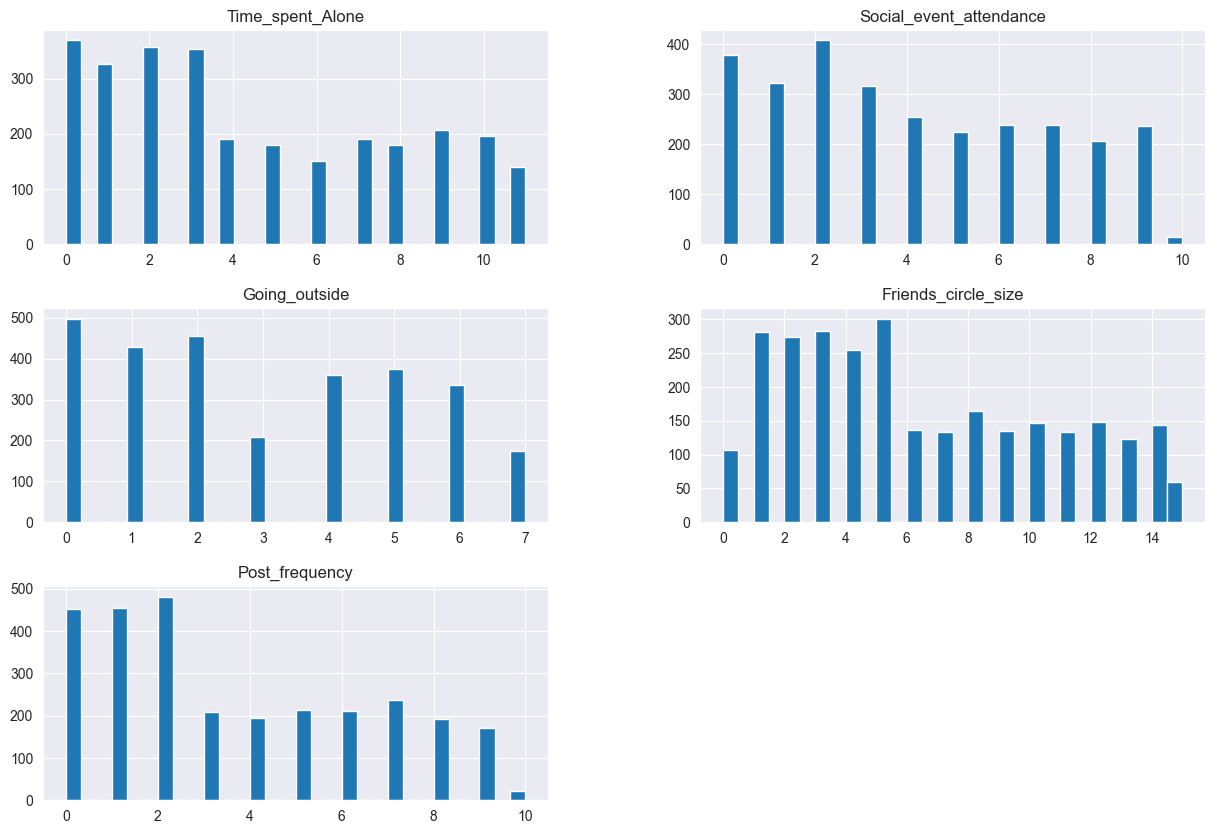

In [33]:
data.hist(bins=30, figsize=(15, 10))

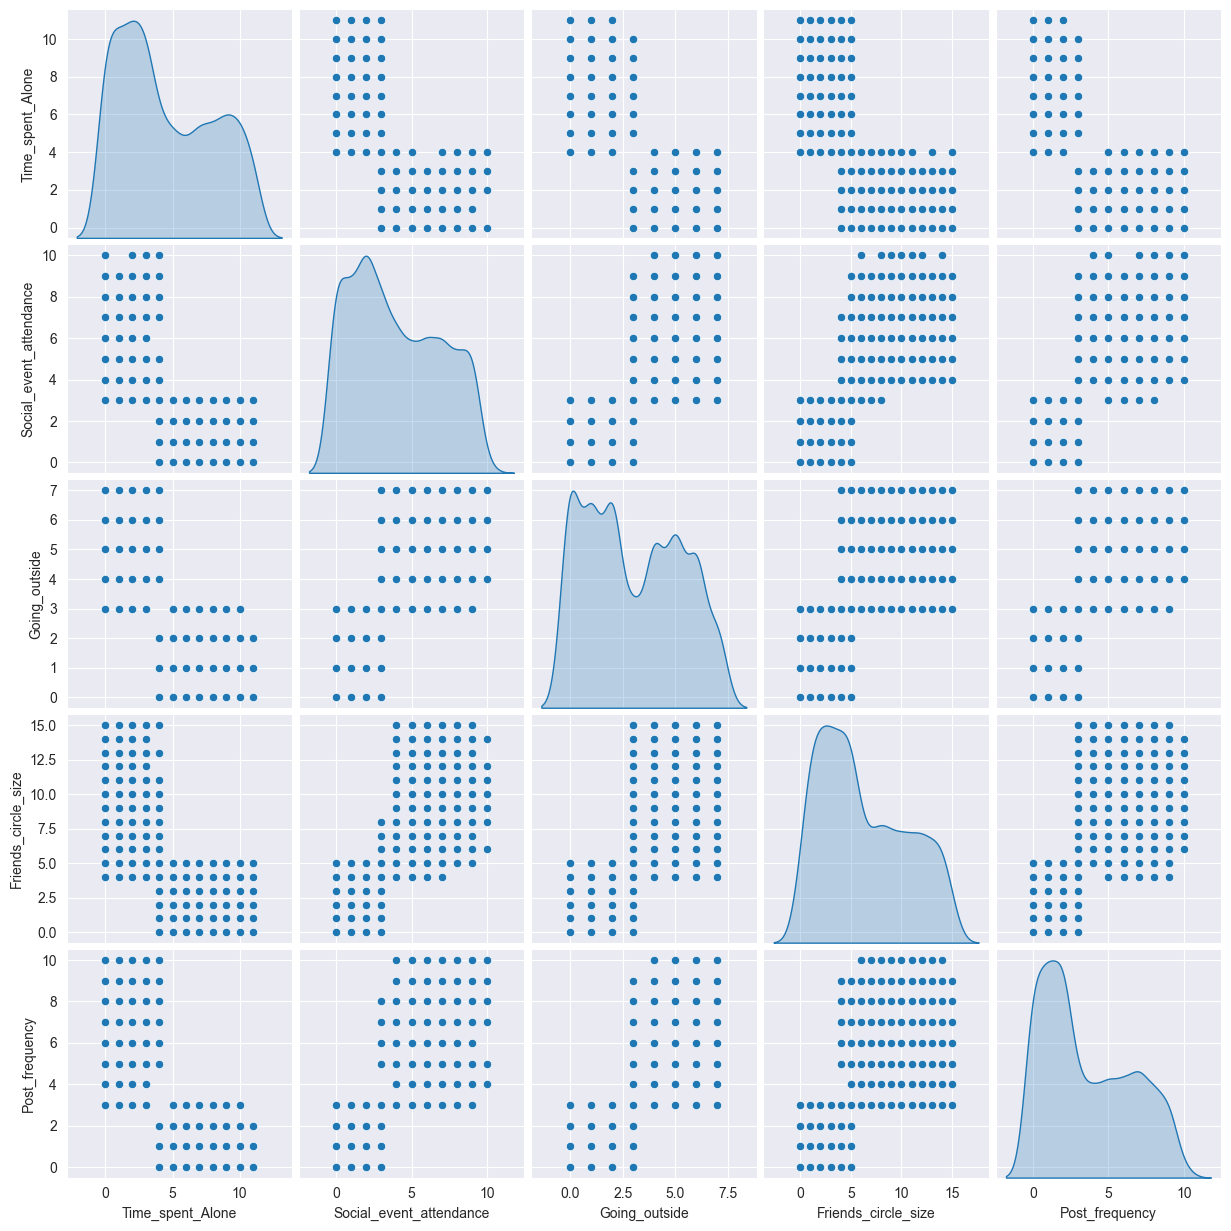

In [34]:
sns.pairplot(data, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

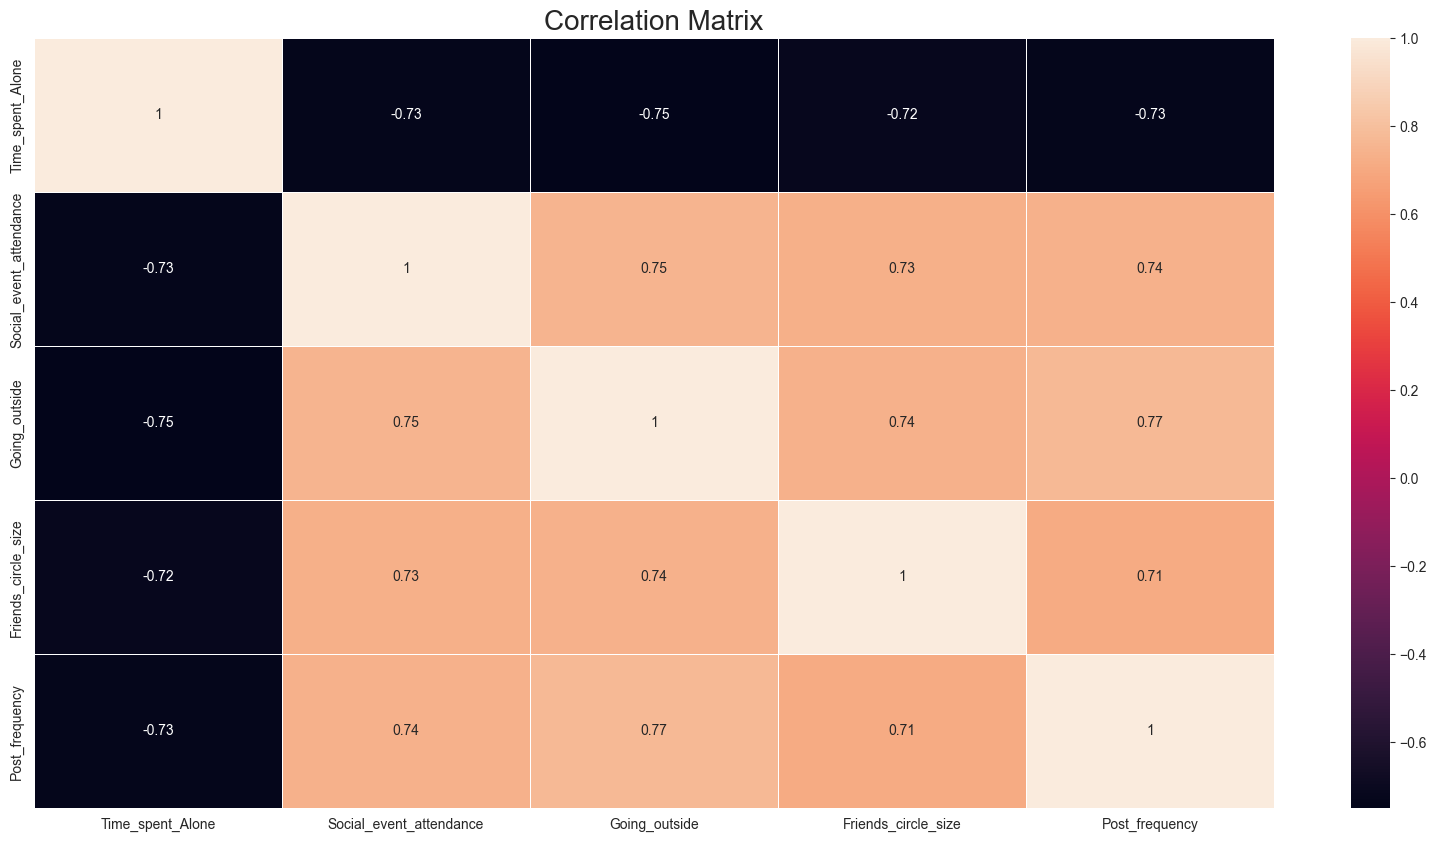

In [35]:
num_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(20, 10))
correlation_matrix = data[num_cols].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Matrix", size=20)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [61]:
data = pd.read_csv('personality_dataset.csv')

In [62]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


In [63]:
data.drop_duplicates(inplace=True)
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2888,5.0,Yes,0.0,1.0,Yes,1.0,0.0,Introvert
2889,6.0,Yes,0.0,0.0,Yes,3.0,0.0,Introvert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert


In [64]:
X = data.drop('Personality', axis=1)
y = data['Personality']
X_processed = X.copy()
y_processed = y.copy()

In [65]:
numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_processed[numerical_cols] = scaler.fit_transform(X_processed[numerical_cols])
X_processed['Stage_fear'] = X_processed['Stage_fear'].map({'Yes': 1, 'No': 0})
X_processed['Drained_after_socializing'] = X_processed['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

In [66]:
le = LabelEncoder()
y_processed = le.fit_transform(y_processed)

In [67]:
data_preprocessed = X_processed.copy()
data_preprocessed['Personality'] = y_processed
data_preprocessed

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.053961,0,-0.078672,1.220902,0,1.466117,0.385809,0
1,1.393730,1,-1.456988,-1.439886,1,-1.520207,-0.291536,1
2,1.393730,1,-1.112409,-0.552957,1,-0.371621,-0.630208,1
3,-1.212114,0,0.610486,1.664367,0,1.695835,1.401826,0
4,-0.343499,0,1.644224,0.333972,0,0.317531,0.385809,0
...,...,...,...,...,...,...,...,...
2888,0.235578,1,-1.456988,-0.996422,1,-1.290490,-1.307553,1
2889,0.525116,1,-1.456988,-1.439886,1,-0.831055,-1.307553,1
2896,-0.343499,0,1.299645,-0.109492,0,1.695835,1.740498,0
2897,-0.053961,1,-1.112409,-0.996422,1,-0.601338,-1.307553,1
